1. Read the file

In [1]:
import pandas as pd
df = pd.read_csv('train.csv')
df.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

2. Impute missing values

In [3]:
df.isnull().sum()
#missing values in Item_weight and Outlet_size needs to be imputed
mean = df['Item_Weight'].mean() #imputing item_weight with mean
df['Item_Weight'].fillna(mean, inplace =True)

mode = df['Outlet_Size'].mode() #imputing outlet size with mode
df['Outlet_Size'].fillna(mode[0], inplace =True)

3. Deal with categorical variables and drop the id columns



In [4]:
df.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1, inplace=True)
df = pd.get_dummies(df)

In [5]:
df.head()

Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year  \
0         9.30         0.016047  249.8092                       1999   
1         5.92         0.019278   48.2692                       2009   
2        17.50         0.016760  141.6180                       1999   
3        19.20         0.000000  182.0950                       1998   
4         8.93         0.000000   53.8614                       1987   

   Item_Outlet_Sales  Item_Fat_Content_LF  Item_Fat_Content_Low Fat  \
0          3735.1380                    0                         1   
1           443.4228                    0                         0   
2          2097.2700                    0                         1   
3           732.3800                    0                         0   
4           994.7052                    0                         1   

   Item_Fat_Content_Regular  Item_Fat_Content_low fat  Item_Fat_Content_reg  \
0                         0                         0                     0   
1                         1                         0                     0   
2                         0                         0                     0   
3                         1                         0                     0   
4                         0                         0                     0   

               ...                Outlet_Size_High  Outlet_Size_Medium  \
0              ...                               0                   1   
1              ...                               0                   1   
2              ...                               0                   1   
3              ...                               0                   1   
4              ...                               1                   0   

   Outlet_Size_Small  Outlet_Location_Type_Tier 1  \
0                  0                            1   
1                  0                            0   
2                  0                            1   
3                  0                            0   
4                  0                            0   

   Outlet_Location_Type_Tier 2  Outlet_Location_Type_Tier 3  \
0                            0                            0   
1                            0                            1   
2                            0                            0   
3                            0                            1   
4                            0                            1   

   Outlet_Type_Grocery Store  Outlet_Type_Supermarket Type1  \
0                          0                              1   
1                          0                              0   
2                          0                              1   
3                          1                              0   
4                          0                              1   

   Outlet_Type_Supermarket Type2  Outlet_Type_Supermarket Type3  
0                              0                              0  
1                              1                              0  
2                              0                              0  
3                              0                              0  
4                              0                              0  

[5 rows x 36 columns]

4. Create train and test set

In [6]:
from sklearn.model_selection import train_test_split
train , test = train_test_split(df, test_size = 0.3)

x_train = train.drop('Item_Outlet_Sales', axis=1)
y_train = train['Item_Outlet_Sales']

x_test = test.drop('Item_Outlet_Sales', axis = 1)
y_test = test['Item_Outlet_Sales']

5. Preprocessing – Scaling the features

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)

C:\Users\472848\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\472848\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


6. Let us have a look at the error rate for different k values

In [8]:
#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 1571.1254868436404
RMSE value for k=  2 is: 1366.3506097386473
RMSE value for k=  3 is: 1296.2746908792044
RMSE value for k=  4 is: 1268.7485066906163
RMSE value for k=  5 is: 1241.5639771474214
RMSE value for k=  6 is: 1226.8873278247745
RMSE value for k=  7 is: 1220.4333320723056
RMSE value for k=  8 is: 1221.871068777859
RMSE value for k=  9 is: 1219.3429440438065
RMSE value for k=  10 is: 1222.949340039924
RMSE value for k=  11 is: 1226.6050146811235
RMSE value for k=  12 is: 1228.0888496525968
RMSE value for k=  13 is: 1229.1166119208965
RMSE value for k=  14 is: 1237.2877501355608
RMSE value for k=  15 is: 1242.2674852602602
RMSE value for k=  16 is: 1248.6870330998618
RMSE value for k=  17 is: 1253.5155257164859
RMSE value for k=  18 is: 1257.2659649294308
RMSE value for k=  19 is: 1264.3566625259255
RMSE value for k=  20 is: 1266.882102843188


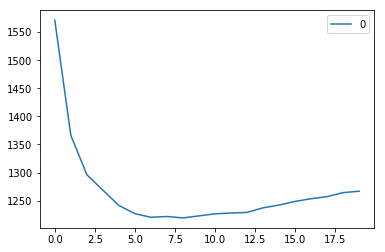

In [11]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot();

As we discussed, when we take k=1, we get a very high RMSE value. The RMSE value decreases as we increase the k value. At k= 7, the RMSE is approximately 1219.06, and shoots up on further increasing the k value. We can safely say that k=7 will give us the best result in this case.

In [12]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(x_train,y_train)
model.best_params_


{'n_neighbors': 9}

7. Predictions on the test dataset

In [13]:
#reading test and submission files
test = pd.read_csv('test.csv')
submission = pd.read_csv('SampleSubmission.csv')

submission['Item_Identifier'] = test['Item_Identifier']
submission['Outlet_Identifier'] = test['Outlet_Identifier']


#preprocessing test dataset
test.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1, inplace=True)
test['Item_Weight'].fillna(mean, inplace =True)
test = pd.get_dummies(test)
test_scaled = scaler.fit_transform(test)
test = pd.DataFrame(test_scaled)


#predicting on the test set and creating submission file
predict = model.predict(test)
submission['Item_Outlet_Sales'] = predict
submission.to_csv('submit_file.csv',index=False)

C:\Users\472848\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
